<a href="https://colab.research.google.com/github/SagarHadge0/NLP-projects/blob/main/google_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
datasets_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [ ]:
datasets_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = datasets_train.iloc[:,1:2].values

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
training_set.shape

(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range =(0,1))

In [ ]:
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train =[]
y_train =[]
for i in range(60,len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [ ]:
x_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [ ]:
len(x_train)

1198

In [ ]:
len(y_train)

1198

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
y_train.shape

(1198,)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [ ]:
regressor.compile(optimizer='adam',loss ='mean_squared_error')

In [ ]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 188ms/step - loss: 0.0216
Epoch 2/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0035
Epoch 5/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0036
Epoch 6/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0037
Epoch 7/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0035
Epoch 10/100
38/38 [==============================] - 7s 188ms/step - loss: 0.0029
Epoch 11/100
38/38 [==============================] - 9s 244ms/step - loss: 0.0034
Epoch 12/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0039
Epoch 13/100

In [ ]:
datasets_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
datasets_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
real_stock_price = datasets_test.iloc[:,1:2].values

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total = pd.concat((datasets_train["Open"],datasets_test["Open"]),axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(datasets_test)-60:].values

In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
inputs.shape

(80,)

In [ ]:
input = inputs.reshape(-1,1)

In [ ]:
input

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [ ]:
input = sc.transform(input)

In [ ]:
x_test=[]
for i in range (60,80):
  x_test.append(input[i-60:i,0])

In [ ]:
x_test


[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(20, 60, 1)

In [ ]:
predicted_stock_price = regressor.predict(x_test)

1/1 [==============================] - 3s 3s/step


In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[792.33795],
       [789.7281 ],
       [793.2566 ],
       [794.33997],
       [798.42737],
       [805.6559 ],
       [809.16534],
       [808.3819 ],
       [808.90216],
       [809.9596 ],
       [810.6791 ],
       [810.6617 ],
       [810.5537 ],
       [811.6407 ],
       [812.51483],
       [820.30804],
       [827.5006 ],
       [833.6969 ],
       [833.99115],
       [823.9025 ]], dtype=float32)

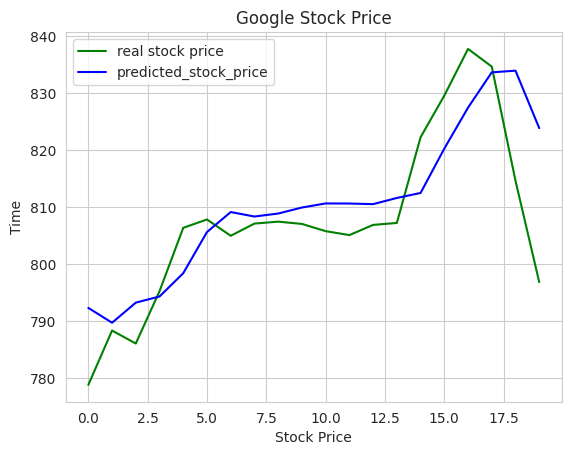

In [ ]:
plt.plot(real_stock_price,color="green",label="real stock price")
plt.plot(predicted_stock_price,color='blue',label='predicted_stock_price')
plt.title("Google Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Time")
plt.legend()
plt.show()